In [24]:
import pandas as pd
import plotly.express as px

# Wczytaj dane z pliku CSV
df = pd.read_csv("../Mental health 2023./CSV/WHR2023.csv")

# Utwórz mapę
fig = px.choropleth(
    df,
    locations="Country name",         # Kolumna z nazwami państw
    locationmode="country names",# Dopasowanie po nazwach krajów
    color="Ladder score",          # Kolumna z wartościami
    color_continuous_scale="Viridis", # Skala kolorów
    title="Procent wartości na mapie świata"
)

# Pokaż mapę
fig.show()


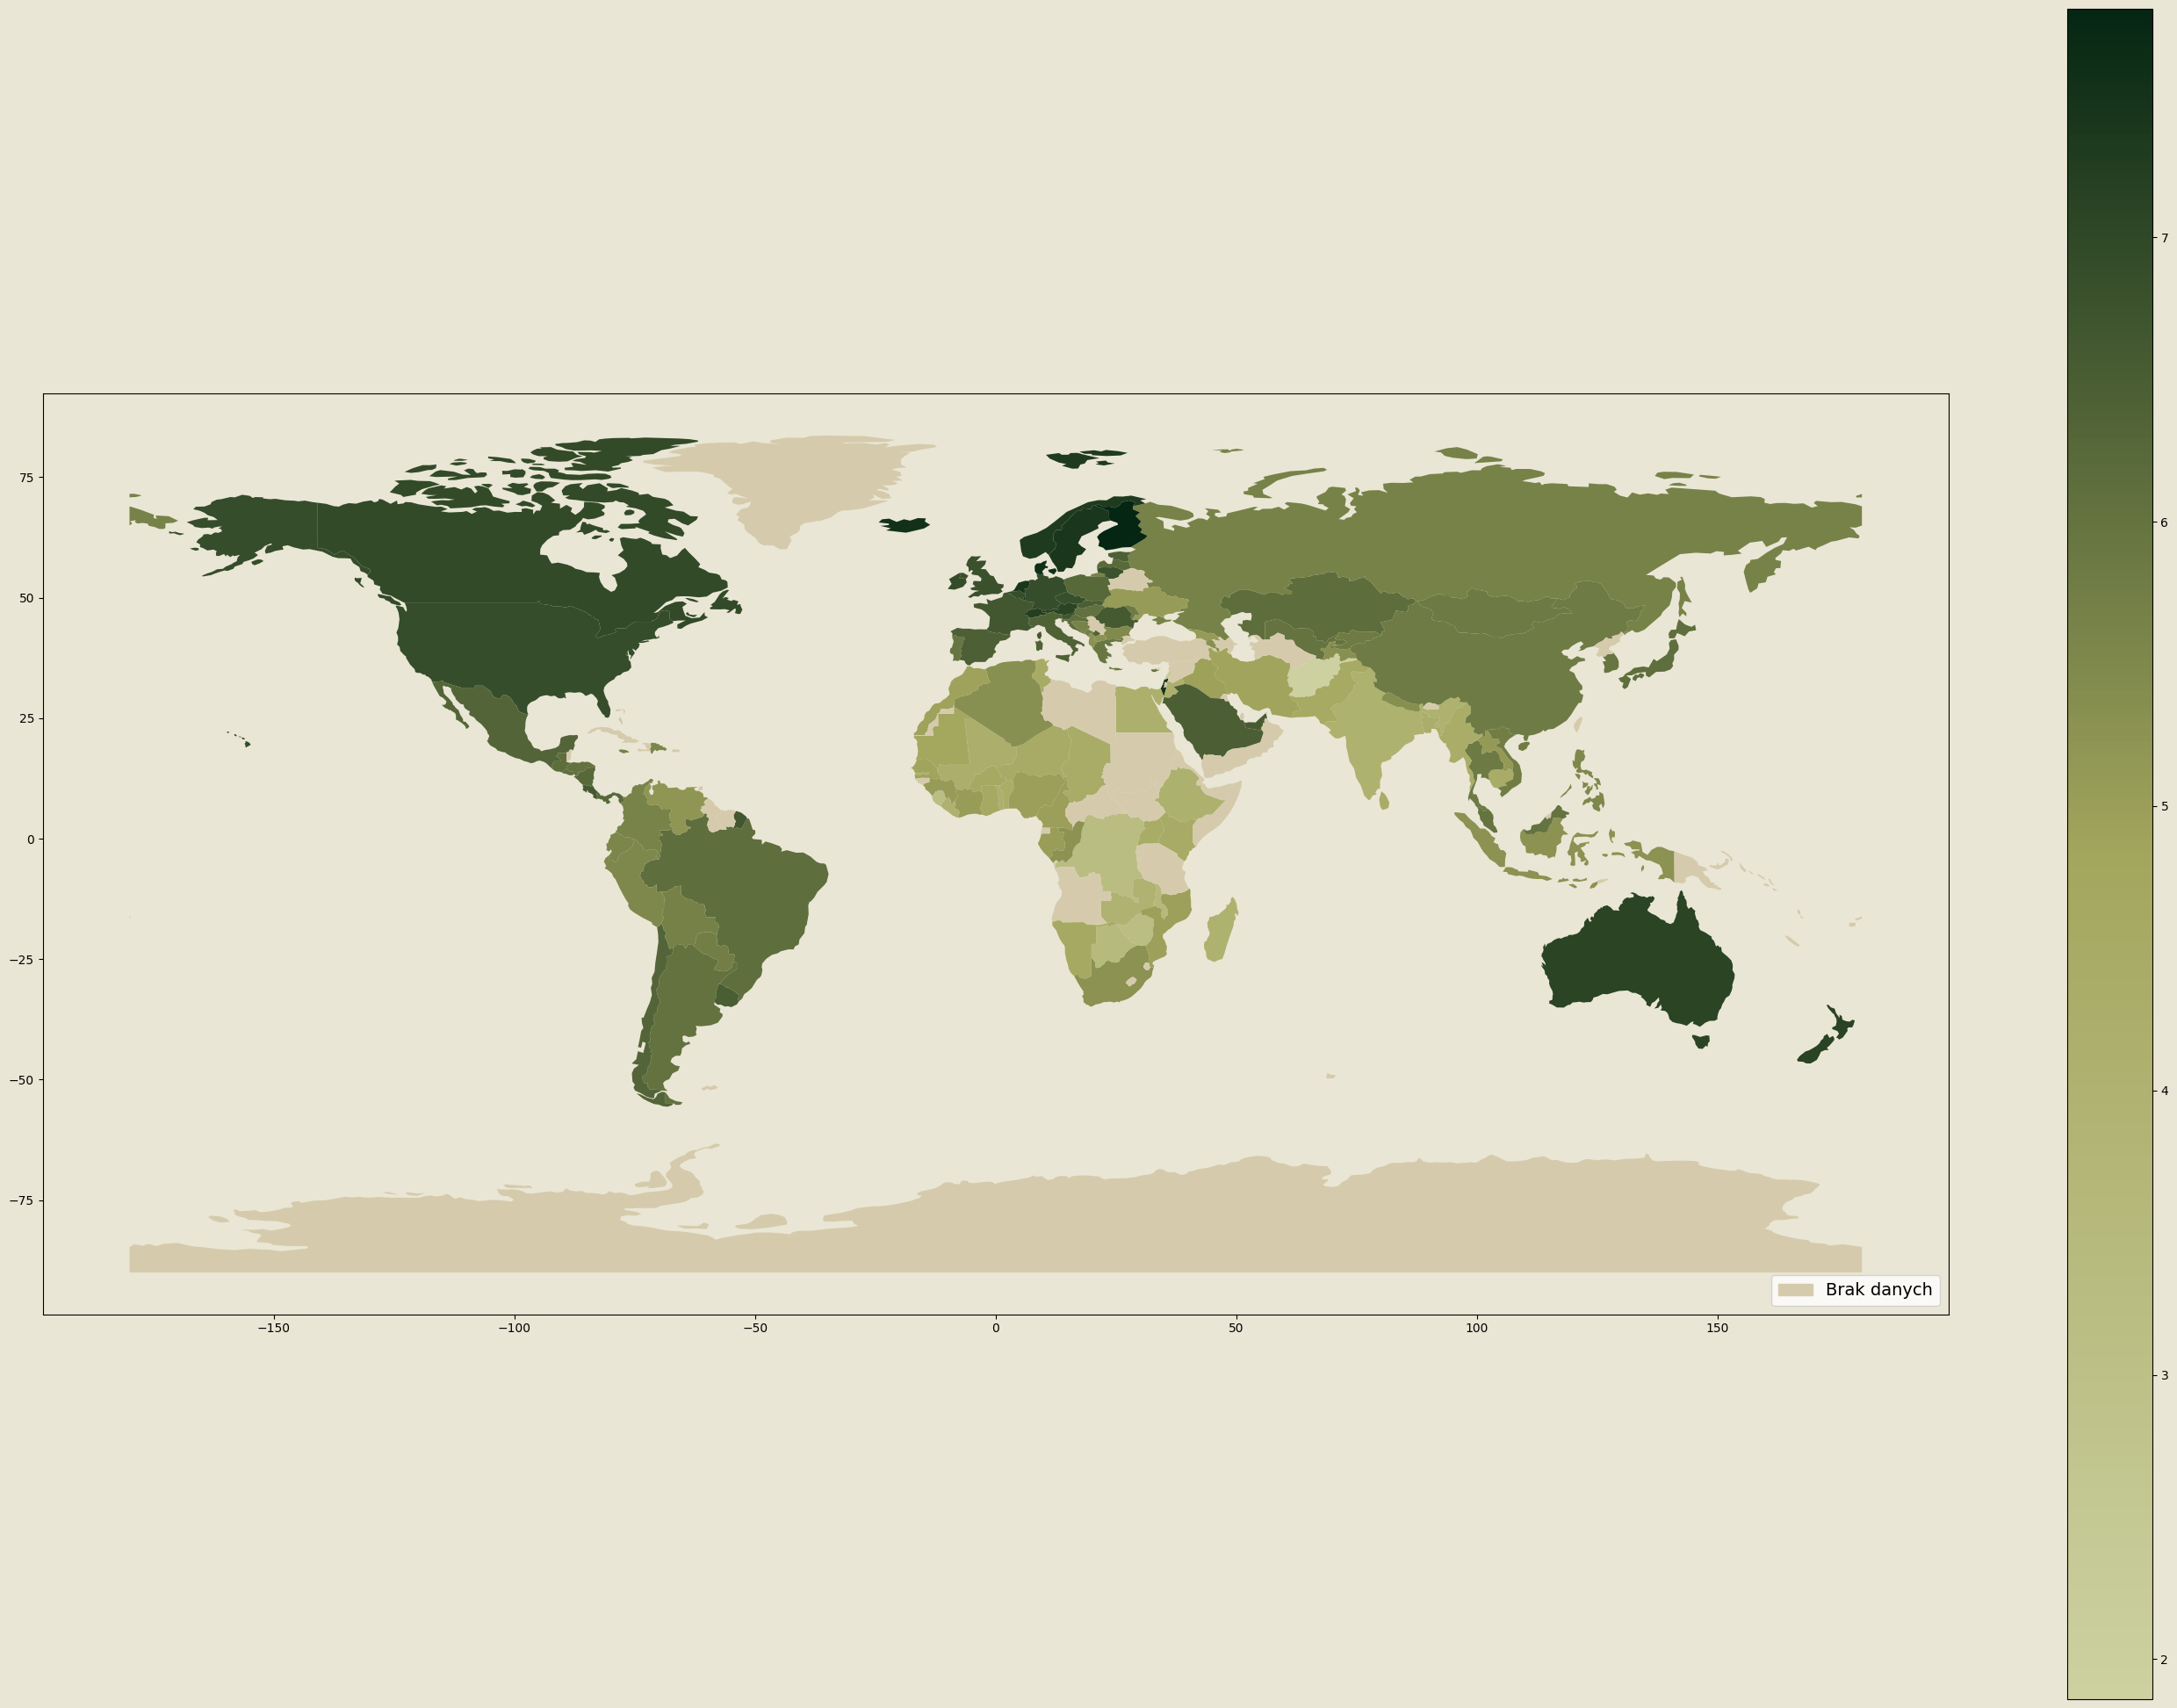

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker


# Ścieżka do pobranego pliku Shapefile
shapefile_path = "../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Wczytanie danych granic państw
world = gpd.read_file(shapefile_path)

# Ujednolicenie nazw w pliku CSV
df['Country name'] = df['Country name'].replace({
    'United States': 'United States of America',
    "Congo (Brazzaville)": "Republic of the Congo",    
    "Congo (Kinshasa)": "Democratic Republic of the Congo" 
})

world = world.merge(df, how="left", left_on="ADMIN", right_on="Country name")


# Tworzenie niestandardowej palety kolorów
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#cdd1a1', "#A3A65D", "#052613"])

# Tworzenie mapy
fig, ax = plt.subplots(1, 1, figsize=(35, 25))
world.plot(
    column="Ladder score",
    cmap=custom_cmap,
    legend=True,
    ax=ax,
    missing_kwds={"color": "#d5cbac", "label": "Brak danych"}
)

# Zmiana koloru tła wykresu
fig.patch.set_facecolor('#EAE6D5')  # Kolor całego wykresu (tła)

# Ustawienie tła samej mapy
ax.set_facecolor('#EAE6D5')  # Kolor tła samej mapy
missing_data_patch = mpatches.Patch(color='#d5cbac', label='Brak danych')

# Dodanie legendy obok mapy
ax.legend(handles=[missing_data_patch], loc='lower right', fontsize=14, title="")

# Tworzymy obiekt ScalarMappable do colorbara
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=world["Ladder score"].min(), vmax=world["Ladder score"].max()))
sm.set_array([])

# Dodanie colorbar do wykresu
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Wskaźnik ogólnego szczęścia', fontsize=14)

# Odwrócenie etykiet na colorbarze
# cbar.ax.invert_yaxis()  # Odwracamy etykiety na osi y

# # Dopasowanie etykiet na colorbarze
# ticks = cbar.ax.get_yticks()  # Pobierz aktualne ticki
# cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in ticks])  # Dopasowanie etykiet

# # Dodanie etykiet "low" na dole i "high" na górze
# cbar.ax.set_yticklabels(['', ''])

# # Przesunięcie etykiety "low" wyżej (np. o 5% w osi Y)
# low_label = cbar.ax.get_yticklabels()[1]
# low_position = low_label.get_position()
# low_label.set_position((low_position[0], low_position[1] + 20))  # Zwiększamy pozycję y o 0.05

plt.show()
